## K-means Clustering
K-means clustering is a type of unsupervised learning algorithm that groups similar data points into clusters
based on their features. It is a type of centroid-based clustering algorithm, which means that each cluster is represented by a centroid or mean value of the data points in that cluster.

- It works on unlabelled data & make the data points into clusters based on their features.
- It is a type of centroid-based clustering algorithm.
- It is used to identify patterns or groupings in data that are not easily visible.
- It is used to reduce the dimensionality of data by identifying the most important features.
- It is used to identify outliers in data.
- It is used to identify relationships between data points.
  


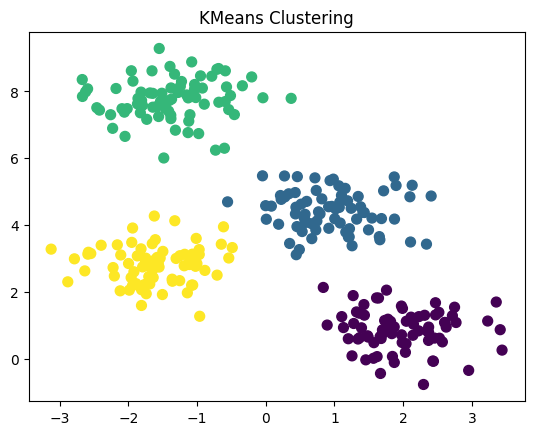

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Initiate a KMeans instance with 4 clusters
kmeans = KMeans(n_clusters=4)
# Fit the model to the data
kmeans.fit(X)
# get the predicted cluster labels for each data point
labels = kmeans.labels_
# plot the data points with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('KMeans Clustering')
plt.show()



### Let's practice on diamonds dataset

In [4]:
df=sns.load_dataset('diamonds')
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

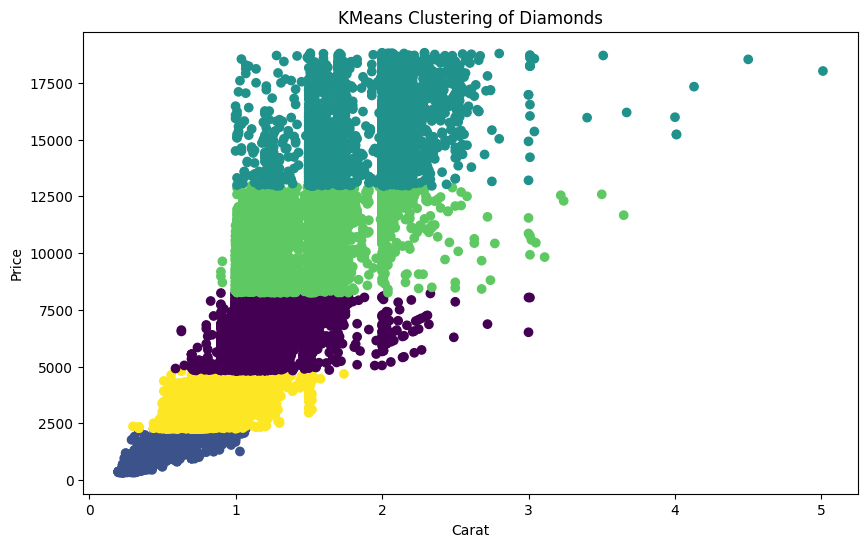

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df=sns.load_dataset('diamonds')
X=df[['carat','price']]

kmeans=KMeans(n_clusters=5)
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels=kmeans.labels_
# Add the labels to the original dataframe
df['labels']=labels
# Plot the clusters
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=labels)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('KMeans Clustering of Diamonds')
plt.show()


In [22]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z  labels
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43       1
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31       1
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31       1
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63       1
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75       1

### Let's change the number of clusters

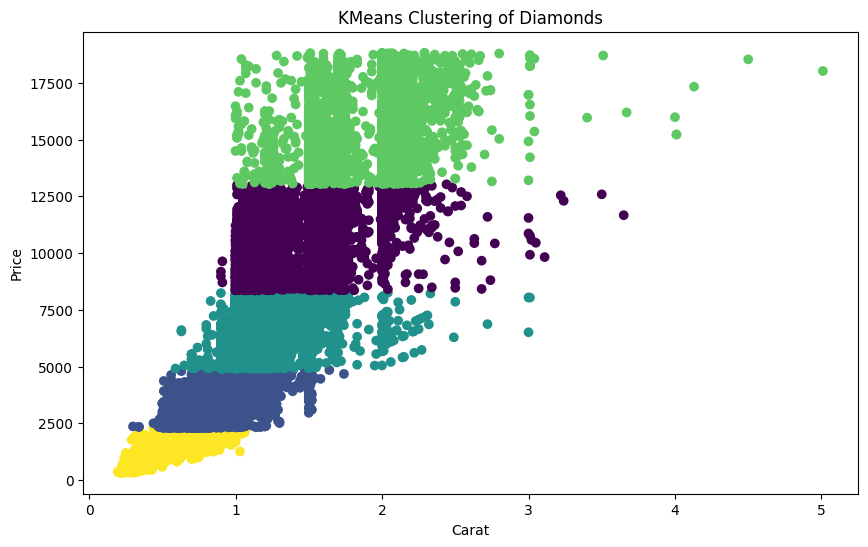

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

diamonds = sns.load_dataset('diamonds')

# Select the features for clustering
X = diamonds[['carat', 'price','cut','color','clarity']]
# Convert categorical variables to numerical
x= pd.get_dummies(X)

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(x)
# Get the predicted cluster labels for each data point
labels = kmeans.labels_
# Add the labels to the original dataframe
diamonds['labels'] = labels
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('KMeans Clustering of Diamonds')
plt.show()


### Can we plot categorical data?

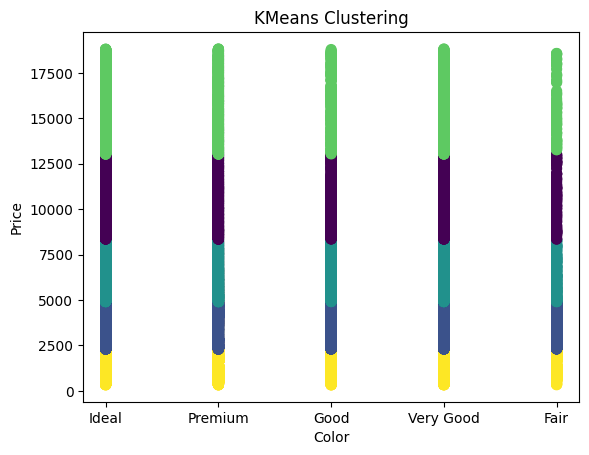

In [24]:
#plot the data points with different colors for each cluster
plt.scatter(X.iloc[:, 2], X.iloc[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('KMeans Clustering')
plt.show()

### Adding Cluster labels to the data for further EDA work

In [29]:
# Select the features for clustering
X = diamonds[['carat', 'price']]
#Instantiate the KMeans model
kmeans = KMeans(n_clusters=5)
# Fit the model to the data
kmeans.fit(X)
# Get the predicted cluster labels for each data point
labels = kmeans.predict(X)
# Add the labels to the original dataframe
diamonds['labels'] = labels
# Display the first few rows of the dataframe with the cluster labels
print(diamonds.head())
#Display the unique values of the cluster labels
print("The unique values of the labels are: ",sorted( diamonds.labels.unique()))




   carat      cut color clarity  depth  ...     x     y     z  labels  cluster
0   0.23    Ideal     E     SI2   61.5  ...  3.95  3.98  2.43       3        1
1   0.21  Premium     E     SI1   59.8  ...  3.89  3.84  2.31       3        1
2   0.23     Good     E     VS1   56.9  ...  4.05  4.07  2.31       3        1
3   0.29  Premium     I     VS2   62.4  ...  4.20  4.23  2.63       3        1
4   0.31     Good     J     SI2   63.3  ...  4.34  4.35  2.75       3        1

[5 rows x 12 columns]
The unique values of the labels are:  [0, 1, 2, 3, 4]


### Make a parallel coordinate plot using plotly express

In [30]:
import plotly.express as px
fig=px.parallel_coordinates(diamonds, color='labels')
fig.show()

In [32]:
kmeans.inertia_

37594029758.30124

## Model Evaluation

1. Elbow Method: This method is used to determine the optimal number of clusters. It involves plotting the sum of squared errors


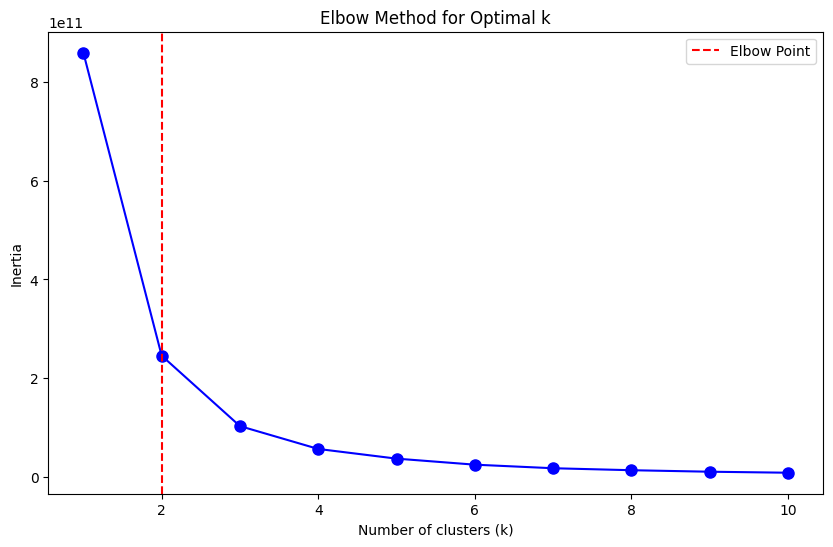

The best value of k is 2


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the diamonds dataset
df = sns.load_dataset('diamonds')
# Select the features for clustering
features = diamonds[['carat', 'depth', 'price']]
# Extract the select features from the dataframe
X= df[features.columns]
#Perform KMeans clustering for different values of k
k_values=range(1, 11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')


# Find the elbow point
diff=[inertias[i]-inertias[i+1] for i in range(len(inertias)-1)]
best_k=diff.index(max(diff))+2
# Add the vertical line to indicate the elbow point
plt.axvline(x=best_k, color='r', linestyle='--',label='Elbow Point')
plt.legend()
plt.show()

print(f"The best value of k is {best_k}")

## 2. Silouette Method

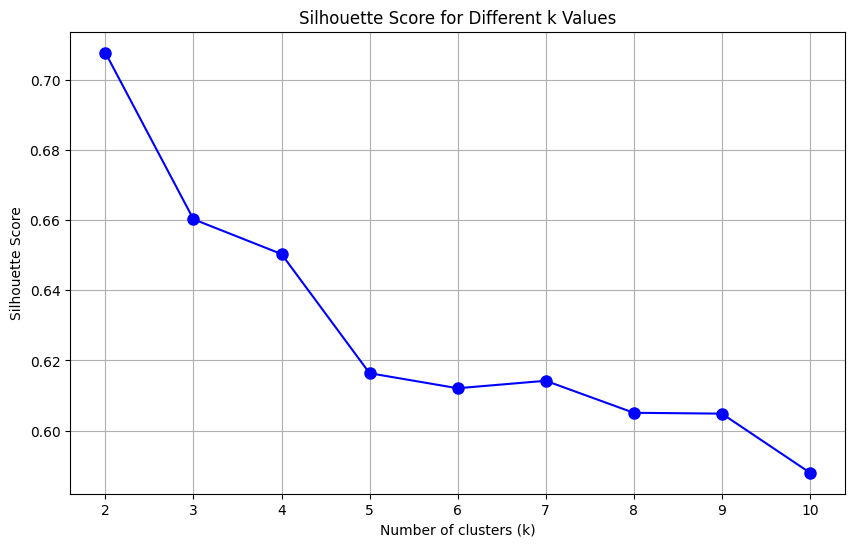

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the diamonds dataset
df = sns.load_dataset('diamonds')
# Select the features for clustering
features = diamonds[['carat', 'depth', 'price']]
# Extract the select features from the dataframe
X= df[features.columns]
# Perform KMeans clustering for different values of k
k_values=range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append( silhouette_score(X, labels))
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.xticks(k_values)
plt.grid()
plt.show()


